In [21]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [22]:
candy= pd.read_csv('candy_production.csv')
candy.head(12)

,observation_date,industrial_production
0,1972-01-01,85.6945
1,1972-02-01,71.8200
2,1972-03-01,66.0229
3,1972-04-01,64.5645
4,1972-05-01,65.0100
5,1972-06-01,67.6467
6,1972-07-01,69.0429
7,1972-08-01,70.8370
8,1972-09-01,75.0462
9,1972-10-01,106.9289


In [23]:
candy['observation_date'] = pd.to_datetime(candy['observation_date'])
candy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   observation_date       548 non-null    datetime64[ns]
 1   industrial_production  548 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 8.7 KB


<Axes: xlabel='observation_date'>

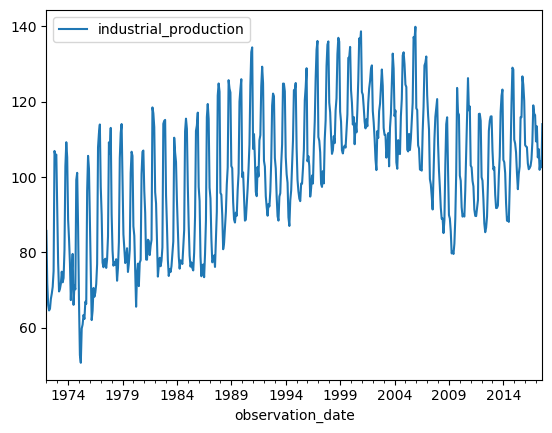

In [24]:
candy.plot(x='observation_date', y='industrial_production')

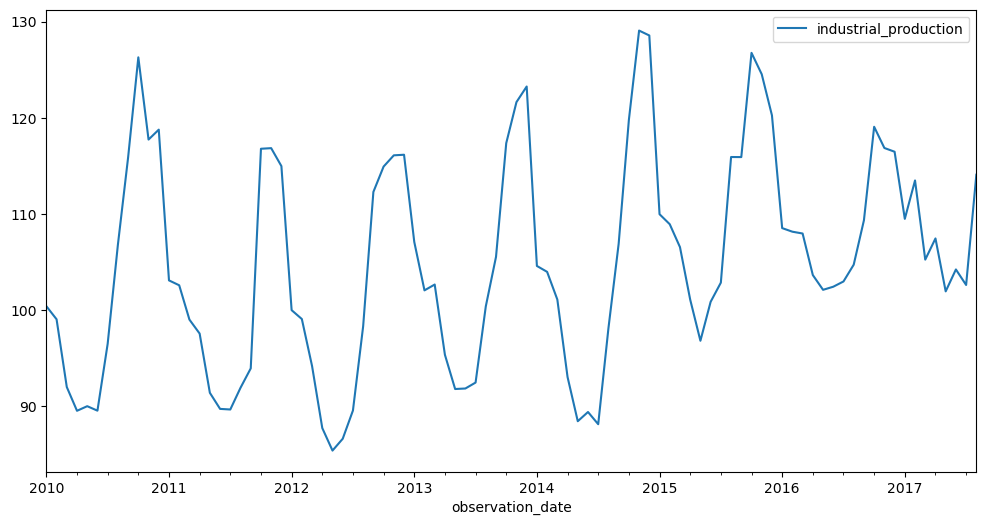

In [25]:
candy_filtered = candy[candy['observation_date'] >= '2010-01-01']
ax = candy_filtered.plot(x='observation_date', y='industrial_production',figsize=(12, 6))

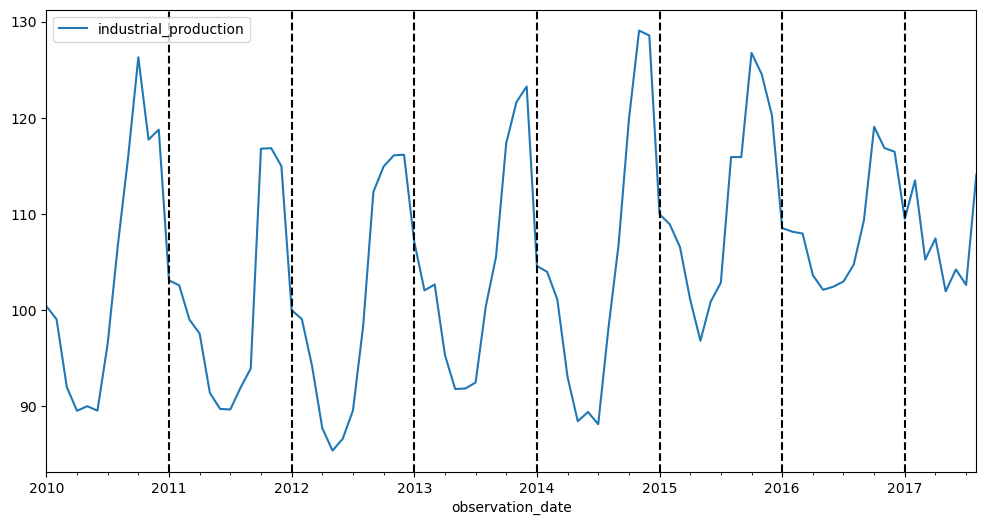

In [26]:
ax = candy_filtered.plot(x='observation_date', y='industrial_production',figsize=(12, 6))
xcoords = ['2011-01-01', '2012-01-01', '2013-01-01', '2014-01-01', '2015-01-01', '2016-01-01', '2017-01-01']

for xc in xcoords:
  plt.axvline(x=xc, color='black', linestyle='--')

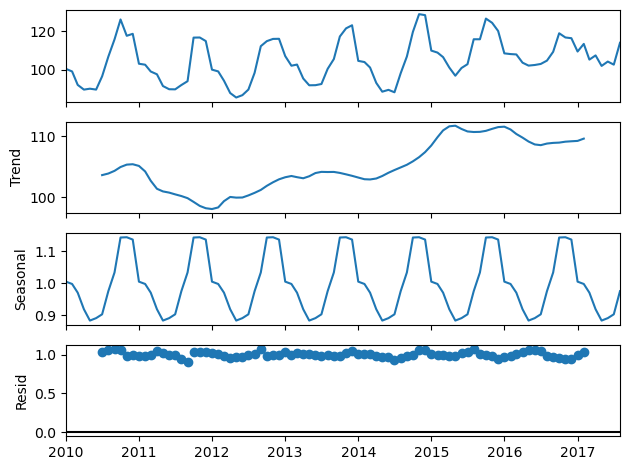

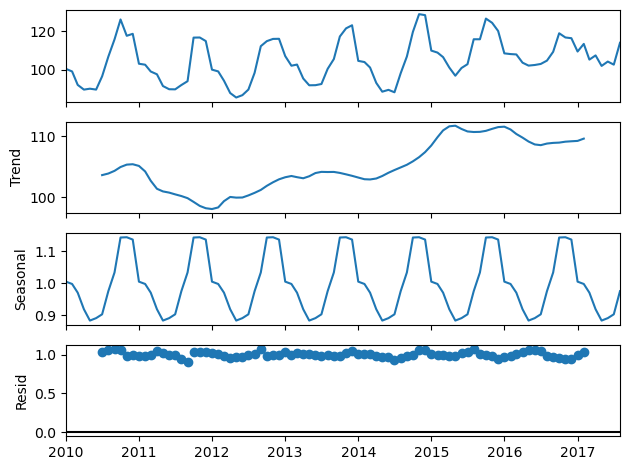

In [28]:
from statsmodels.tsa.seasonal import seasonal_decompose

candy_filtered.set_index('observation_date', inplace=True)

analysis = candy_filtered[['industrial_production']].copy()

decompose_result = seasonal_decompose(analysis,  model='multiplicative')

trend = decompose_result.trend
seasonal = decompose_result.seasonal
residual = decompose_result.resid

decompose_result.plot()